<a href="https://colab.research.google.com/github/Belal-AI/CNN_Model_Transfer_learning/blob/main/visulaiz_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pylab as plt
tf.compat.v1.disable_eager_execution()
import cv2

In [3]:
model=tf.keras.applications.VGG16(include_top =True
                                  ,weights= "imagenet")

553467096/553467096 [==============================] - 9s 0us/step


In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
def preprocess(x):
  x-=x.mean()
  x/=(x.std())
  x=np.clip(x,0,1)

  return x



In [6]:
def pattern_model(layer_name,kernel_index,size=150):
  layer=model.get_layer(layer_name).output

  loss=K.mean(layer[:,:,:,kernel_index])
  grads=K.gradients(loss,model.input)[0]
  grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)

  iterate=K.function([model.input],[loss,grads])

  rand_img=np.random.random((1,size,size,3))*30

  for i in range(40):
    losses,grads=iterate(rand_img)
    rand_img+=grads+.1

  img=rand_img[0]
  return preprocess(img)



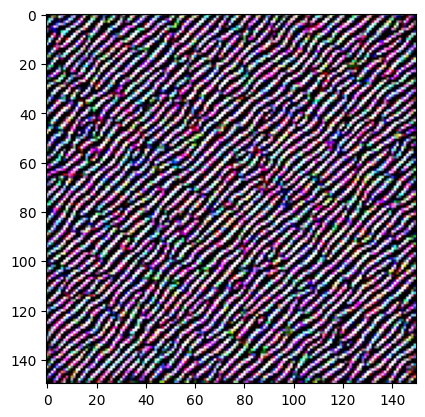

In [7]:
plt.imshow(pattern_model('block2_conv2',10))

In [8]:
lista=[]
for i in ['block1_conv2']:

  for j in range(10):
    print("kernal number"+str(j)+"is loaded ..")
    lista.append(pattern_model(i,j))




kernal number0is loaded ..
kernal number1is loaded ..
kernal number2is loaded ..
kernal number3is loaded ..
kernal number4is loaded ..
kernal number5is loaded ..
kernal number6is loaded ..
kernal number7is loaded ..
kernal number8is loaded ..
kernal number9is loaded ..


In [9]:
model=tf.keras.applications.VGG16(include_top= False, weights="imagenet", input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [10]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [30]:
activatd = [layer.output for layer in model.layers[:5] if not layer.name.startswith('input')]


In [31]:
activatd

[<tf.Tensor 'block1_conv1_1/Relu:0' shape=(None, 150, 150, 64) dtype=float32>,
 <tf.Tensor 'block1_conv2_1/Relu:0' shape=(None, 150, 150, 64) dtype=float32>,
 <tf.Tensor 'block1_pool_1/MaxPool:0' shape=(None, 75, 75, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1_1/Relu:0' shape=(None, 75, 75, 128) dtype=float32>]

In [32]:
model=tf.keras.models.Model(inputs=model.input,outputs=activatd)

In [33]:
img=cv2.imread('/content/288588897_572803277575707_4393860805141508321_n.jpg')

In [34]:
np.array(img).shape

(2048, 1638, 3)

In [35]:
img=np.resize(img,(150,150,3))
img.shape

(150, 150, 3)

In [36]:
img=np.expand_dims(img,axis=0)
img.shape

(1, 150, 150, 3)

In [39]:
outs=model.predict(img)

In [40]:
len(outs)

4

In [41]:
layer=outs[0]

In [42]:
layer.shape

(1, 150, 150, 64)

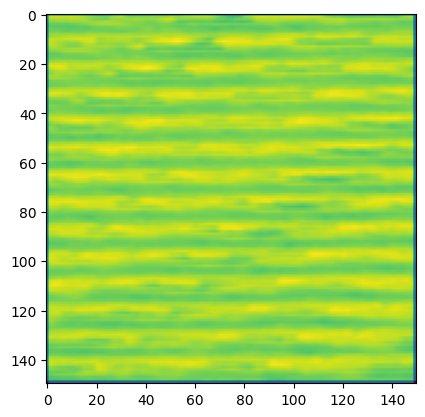

In [47]:
plt.imshow(layer[0,:,:,1])